# Importing library

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random

# Generating training set

In [2]:
training_set = []
for i in range(40):
    training_set.append([2 * random.random() + 2, 2 * random.random() + 2])
for i in range(40):
    training_set.append([2 * random.random() + 8, 2 * random.random() + 2])
for i in range(40):
    training_set.append([2 * random.random() + 2, 2 * random.random() + 8])
for i in range(40):
    training_set.append([2 * random.random() + 4, 2 * random.random() + 4])
for i in range(40):
    training_set.append([3 * random.random() + 9, 3 * random.random() + 9])
for i in range(40):
    training_set.append([10 * random.random(), 10 * random.random()])

training_set = np.array(training_set)

# Functions

In [3]:
def kmeans(training_set, K, plot=False):
    """
    Divides training set into clusters.
    
    Arguments
        training_set - 2D array with number of columns 2
        K - Number of clusters
        plot - Boolean value whether to plot graph or not
    """
    color = ['r', 'b', 'g', 'c', 'm', 'orange', 'crimson', 'pink', 'brown', 'yellow', 'gray', 'mediumseagreen']
    if plot:
        plt.scatter(training_set[:, 0], training_set[:, 1], c='k')

    cluster_centroids = training_set[np.random.randint(0, training_set.shape[0], K)]
    if plot:
        for k in range(K):
            plt.scatter(cluster_centroids[k][0], cluster_centroids[k][1], c=color[k], marker='X', s=100)
        plt.show()

    m = len(training_set)
    n = len(training_set[0])
    nearest_cluster_centroid = np.zeros(m, dtype='int')
    old_cluster_centroids = np.zeros((K, 2), dtype='float')
    cost = []
    while (np.max(np.absolute(old_cluster_centroids - cluster_centroids)) > 0.001):
        sum_cluster = np.zeros((K, n))
        count_cluster = np.zeros(K, dtype='int')
        distance_from_nearest_cluster_centroid = np.zeros(m, dtype='float')

        for i, xi in enumerate(training_set):
            # find the cluster with minimum distance from our training example.
            nearest_cluster_centroid[i] = np.argmin(np.linalg.norm(cluster_centroids - np.tile(xi, (K, 1)), axis=1))
            sum_cluster[nearest_cluster_centroid[i]] = sum_cluster[nearest_cluster_centroid[i]] + xi
            count_cluster[nearest_cluster_centroid[i]] += 1
            
            distance_from_nearest_cluster_centroid[i] = (cluster_centroids[nearest_cluster_centroid[i]] - xi)[0] ** 2 + (cluster_centroids[nearest_cluster_centroid[i]] - xi)[1] ** 2
            if plot:
                plt.scatter(xi[0], xi[1], c=color[nearest_cluster_centroid[i]], marker='o')

        old_cluster_centroids = cluster_centroids.copy()
        for k in range(K):
            if count_cluster[k] != 0:
                cluster_centroids[k] = sum_cluster[k] / count_cluster[k]
            else:
                cluster_centroids[k] = np.array([random.randint(int(min(training_set[:, 0])), int(max(training_set[:, 0]))),
                                   random.randint(int(min(training_set[:, 1])), int(max(training_set[:, 1])))], dtype='float')
            if plot:
                plt.scatter(cluster_centroids[k][0], cluster_centroids[k][1], c=color[k], marker='X', s=100)

        cost.append(np.sum(distance_from_nearest_cluster_centroid) / m)
        if plot:
            plt.show()
    if plot:
        plt.plot(cost)
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title('Cost vs Interations')
        plt.show()
        
    return (cluster_centroids, nearest_cluster_centroid, cost[-1])

In [4]:
def kmeans_multiply_tries(training_set, K, tries, plot=False):
    """
    Tries KMeans multiple amount of times and gives clusters with minimum error.
    """
    color = ['r', 'b', 'g', 'c', 'm', 'orange', 'crimson', 'pink', 'brown', 'yellow', 'gray', 'mediumseagreen']
    cost = None
    for i in range(tries):
        if cost is None:
            cluster_centroids, nearest_cluster_centroid, cost = kmeans(training_set, K, plot=False)
        else:
            new_cluster_centroids, new_nearest_cluster_centroid, new_cost = kmeans(training_set, K, plot=False)
            if new_cost < cost:
                cluster_centroids, nearest_cluster_centroid, cost = new_cluster_centroids, new_nearest_cluster_centroid, new_cost
    
    if plot:
        for k in range(K):
            plt.scatter(cluster_centroids[k][0], cluster_centroids[k][1], c=color[k], marker='X', s=100)
        for i, xi in enumerate(training_set):
            plt.scatter(xi[0], xi[1], c=color[nearest_cluster_centroid[i]], marker='o')
        plt.show()
        
    return (cluster_centroids, nearest_cluster_centroid, cost)

In [5]:
def plot_cost_vs_K(training_set, max_K, tries=10):
    """
    Plots cost function wrt K.
    """
    costs = []
    for K in range(2, max_K):
        costs.append(kmeans_multiply_tries(training_set, K, tries)[2])
    plt.plot(np.arange(2, max_K), costs)
    plt.xlabel('K')
    plt.ylabel('Cost')
    plt.title('Cost function vs K')
    plt.show()

# Calling functions

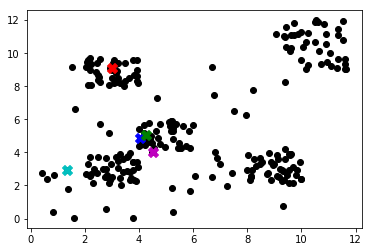

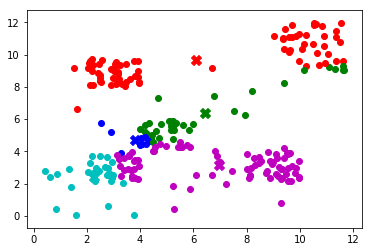

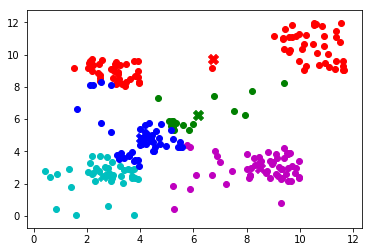

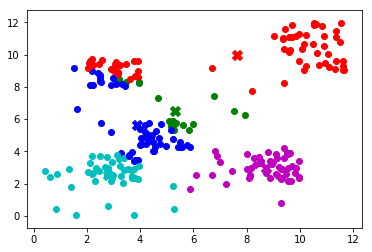

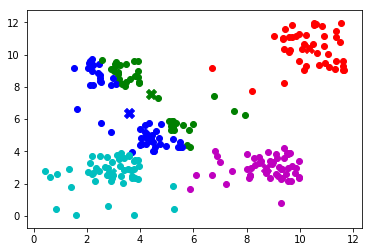

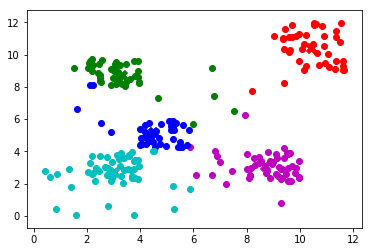

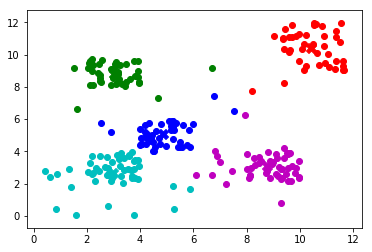

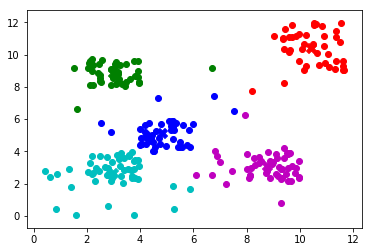

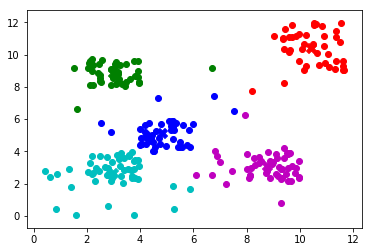

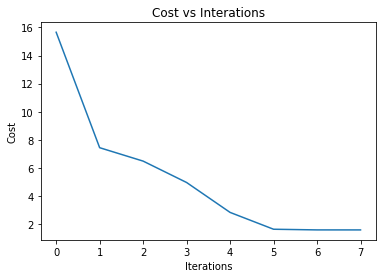

(array([[ 10.41438435,  10.41175003],
        [  4.83964013,   5.11110859],
        [  2.9672815 ,   8.84479359],
        [  2.97056203,   2.63842619],
        [  8.76033967,   3.07239226]]),
 array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 4, 3, 3, 1, 1,
        4, 1, 4, 3, 2, 2, 3, 3, 4, 4, 3, 4, 2, 0, 4, 1, 3, 3, 1, 0, 1, 3, 2,
        4, 4, 1, 4, 2, 3, 4, 3, 4, 2])

In [6]:
kmeans(training_set, 5, plot=True)

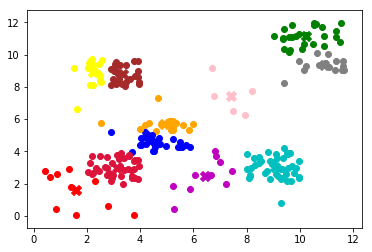

(array([[  1.59168691,   1.57667006],
        [  4.59208385,   4.5588053 ],
        [ 10.222941  ,  11.13282441],
        [  9.07820773,   3.01494671],
        [  6.45210272,   2.47469785],
        [  4.90486623,   5.69777486],
        [  3.1144921 ,   2.97952734],
        [  7.42682291,   7.43653789],
        [  3.37230544,   8.79353769],
        [  2.21702078,   8.89784713],
        [ 10.89303622,   9.33803332]]),
 array([ 6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
         6,  1,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  0,  6,
         6,  6,  6,  6,  6,  6,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  9,  8,  8,  9,  8,
         9,  8,  9,  9,  8,  9,  9,  8,  9,  9,  8,  9,  8,  8,  8,  8,  8,
         9,  9,  8,  8,  8,  8,  8,  9,  8,  8,  8,  9,  8,  8,  8,  9,  8,
         9,  1,  5,  1,  5,  5,  1,  1,  5,  5, 

In [7]:
kmeans_multiply_tries(training_set, 11, tries=10, plot=True)

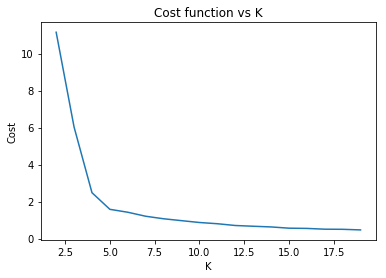

In [8]:
plot_cost_vs_K(training_set, 20, 10)